# INM430 - Analysis of the world's greatest sporting spectacle - OLYMPICS

# Table of Contents 

1. [Initial investigations] 
    1.1 [Importing the packages] 
    1.2 [Statistical derivations]
    1.3 [Merging the datasets] 
    1.4 [Dropping the unnecessary columns] 
2. [Exploratory Data Analysis]
    2.1 [EDA on Summer Olympics]
    2.2 [EDA on Winter Olympics]
    2.3 [EDA on Women Athletes]
    2.4 [EDA on Women Athletes in the USA]
3. [Correlation between GDP of a country and the number of medals they won]
4. [Correlation between Population of a country and the number of medals they won]
5. [Finding whether teams enjoy a home team advantage]
6. [Predicting whether a team wins a gold/silver/bronze given the team name and the sport using Random Forest Classifier]

## 1. Initial investigations

### 1.1 Importing the packages

In [1]:
##Importing the packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Loading the files 
athlete = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')
gdp = pd.read_csv('world_gdp.csv')
population = pd.read_csv('world_pop.csv')
dictionary = pd.read_csv('dictionary.csv')
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
print (athlete.columns)
print (population)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
                            Country Country Code     Indicator Name  \
0                             Aruba          ABW  Population, total   
1                       Afghanistan          AFG  Population, total   
2                            Angola          AGO  Population, total   
3                           Albania          ALB  Population, total   
4                           Andorra          AND  Population, total   
5                               UAE          ARE  Population, total   
6                         Argentina          ARG  Population, total   
7                           Armenia          ARM  Population, total   
8                    American Samoa          ASM  Population, total   
9               Antigua and Barbuda          ATG  Population, total   
10                        Australia          AUS  Populat

In [2]:
##Printing the first 20 rows of summer and winter files 
print (summer.head(20))
print (winter.head(20))

    Year    City      Sport Discipline                Athlete Country Gender  \
0   1896  Athens   Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
1   1896  Athens   Aquatics   Swimming       HERSCHMANN, Otto     AUT    Men   
2   1896  Athens   Aquatics   Swimming      DRIVAS, Dimitrios     GRE    Men   
3   1896  Athens   Aquatics   Swimming     MALOKINIS, Ioannis     GRE    Men   
4   1896  Athens   Aquatics   Swimming     CHASAPIS, Spiridon     GRE    Men   
5   1896  Athens   Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
6   1896  Athens   Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
7   1896  Athens   Aquatics   Swimming       ANDREOU, Joannis     GRE    Men   
8   1896  Athens   Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
9   1896  Athens   Aquatics   Swimming          NEUMANN, Paul     AUT    Men   
10  1896  Athens   Aquatics   Swimming      PEPANOS, Antonios     GRE    Men   
11  1896  Athens  Athletics  Athletics  

In [3]:
print(athlete.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### 1.2 Statistical derivations 

In [4]:
##Statistical derivations
print (athlete['Age'].mean())
print(athlete['Age'].mean())
print(athlete['Age'].std())

25.556898357297374
25.556898357297374
6.393560847032701


In [5]:
##Printing the different sports in the entire summer olympics
print(summer['Sport'].unique())
print(winter['Sport'].unique())

['Aquatics' 'Athletics' 'Cycling' 'Fencing' 'Gymnastics' 'Shooting'
 'Tennis' 'Weightlifting' 'Wrestling' 'Archery' 'Basque Pelota' 'Cricket'
 'Croquet' 'Equestrian' 'Football' 'Golf' 'Polo' 'Rowing' 'Rugby'
 'Sailing' 'Tug of War' 'Boxing' 'Lacrosse' 'Roque' 'Hockey'
 'Jeu de paume' 'Rackets' 'Skating' 'Water Motorsports'
 'Modern Pentathlon' 'Ice Hockey' 'Basketball' 'Canoe / Kayak' 'Handball'
 'Judo' 'Volleyball' 'Table Tennis' 'Badminton' 'Baseball' 'Softball'
 'Taekwondo' 'Triathlon' 'Canoe']
['Biathlon' 'Bobsleigh' 'Curling' 'Ice Hockey' 'Skating' 'Skiing' 'Luge']


In [6]:
##Oldest and youngest athlete
print(athlete['Age'].max())
print(athlete['Age'].min())

97.0
10.0


In [7]:
noc.rename(columns = {'region':'Country'}, inplace = True)
noc.head()

,NOC,Country,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### 1.3 Merging the datasets 

In [8]:
##Joining athlete dataset and noc dataset by NOC
athlete_noc = pd.merge(athlete, noc, left_on = 'NOC',
                                right_on = 'NOC',
                                how='left')
athlete_noc.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athlete_noc.loc[athlete_noc['Country'].isnull(),['NOC', 'Team']].drop_duplicates()


,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [10]:
##Rename the country values wth full forms 
athlete_noc['Country'] = np.where(athlete_noc['NOC']=='SGP', 'Singapore', athlete_noc['Country'])
athlete_noc['Country'] = np.where(athlete_noc['NOC']=='ROT', 'Refugee Olympic Athletes', athlete_noc['Country'])
athlete_noc['Country'] = np.where(athlete_noc['NOC']=='UNK', 'Unknown', athlete_noc['Country'])
athlete_noc['Country'] = np.where(athlete_noc['NOC']=='TUV', 'Tuvalu', athlete_noc['Country'])


##Put these values from Country into Team
athlete_noc.drop('Team', axis = 1, inplace = True)
athlete_noc.rename(columns = {'Country': 'Team'}, inplace = True)

In [11]:
athlete_noc

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,notes
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


### 1.4 Dropping the unnecessary columns 

In [12]:
##Dropping the unnecessary columns in GDP - Indicator name, Indicator code
gdp.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace = True)
#There are a number of columns with years for which GDP has been recorded. 
#Here we try to bring in all the years together in one column - 'Year' for better merging
gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

In [13]:
##Convert the year column to numeric
gdp['Year'] = pd.to_numeric(gdp['Year'])
gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [14]:
athlete_ccode = athlete_noc.merge(gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

athlete_ccode.drop('Country Name', axis = 1, inplace = True)

##Merge to get gdp 
athlete_gdp = athlete_ccode.merge(gdp,
                                 left_on = ['Country Code', 'Year'],
                                 right_on = ['Country Code', 'Year'],
                                how = 'left')

athlete_gdp.drop('Country Name', axis = 1, inplace = True)

In [15]:
##merging population dataset
population.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
population = pd.melt(population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')
##Change the Year to integer type
population['Year'] = pd.to_numeric(population['Year']

In [ ]:
##merging population dataset
population.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
population = pd.melt(population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')
##Change the Year to integer type
population['Year'] = pd.to_numeric(population['Year'])

In [18]:
olympics = athlete_gdp.merge(population, left_on = ['Country Code', 'Year'], right_on= ['Country Code', 'Year'],how = 'left')
olympics.drop('Country', axis = 1, inplace = True)
olympics.drop('notes',axis=1,inplace=True)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN,4.270000e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,8.560000e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD,2.590000e+11,1.476009e+07


Finally we have a merged dataset with GDP and population columns merged from  GDP and Population data sets. We are going to use this data set for further analysis. 

### 2. EXPLORATORY DATA ANALYSIS 

### 2.1 EDA on Summer Olympics

In [19]:
gold_medals = summer[(summer.Medal=='Gold')]
print(gold_medals.head())

    Year    City      Sport Discipline             Athlete Country Gender  \
0   1896  Athens   Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
3   1896  Athens   Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
6   1896  Athens   Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
9   1896  Athens   Aquatics   Swimming       NEUMANN, Paul     AUT    Men   
13  1896  Athens  Athletics  Athletics       BURKE, Thomas     USA    Men   

                         Event Medal  
0               100M Freestyle  Gold  
3   100M Freestyle For Sailors  Gold  
6              1200M Freestyle  Gold  
9               400M Freestyle  Gold  
13                        100M  Gold  


In [20]:
gold_medals.isnull().any()

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [21]:
gold_medals['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

Text(0.5,1,'Distribution of Gold Medals')

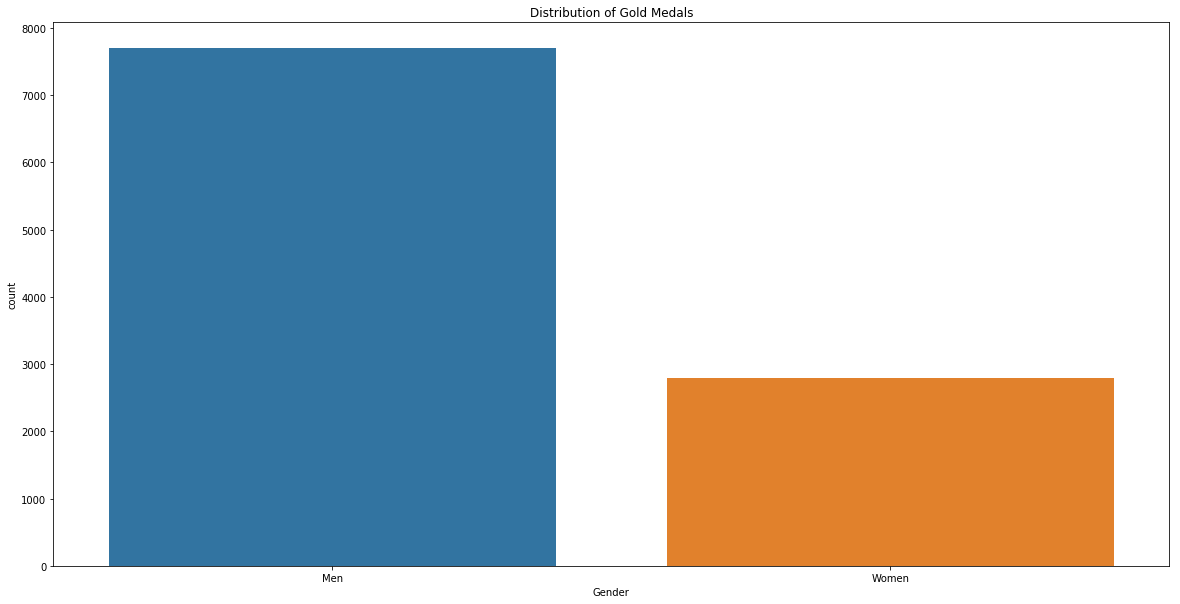

In [22]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_medals['Gender'])
plt.title('Distribution of Gold Medals')

In [23]:
gold_total = athlete_noc[(athlete_noc.Medal == 'Gold')]
print(gold_total)

            ID                                       Name Sex   Age  Height  \
3            4                       Edgar Lindenau Aabye   M  34.0     NaN   
42          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
44          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
48          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
60          20                         Kjetil Andr Aamodt   M  20.0   176.0   
73          20                         Kjetil Andr Aamodt   M  30.0   176.0   
76          20                         Kjetil Andr Aamodt   M  30.0   176.0   
78          20                         Kjetil Andr Aamodt   M  34.0   176.0   
79          21                  Ragnhild Margrethe Aamodt   F  27.0   163.0   
113         40                            Roald Edgar Aas   M  31.0     NaN   
117         42                        Thomas Valentin Aas   M  25.0     NaN   
150         56                                 Ren A

Text(0.5,1,'Distribution of Gold Medals')

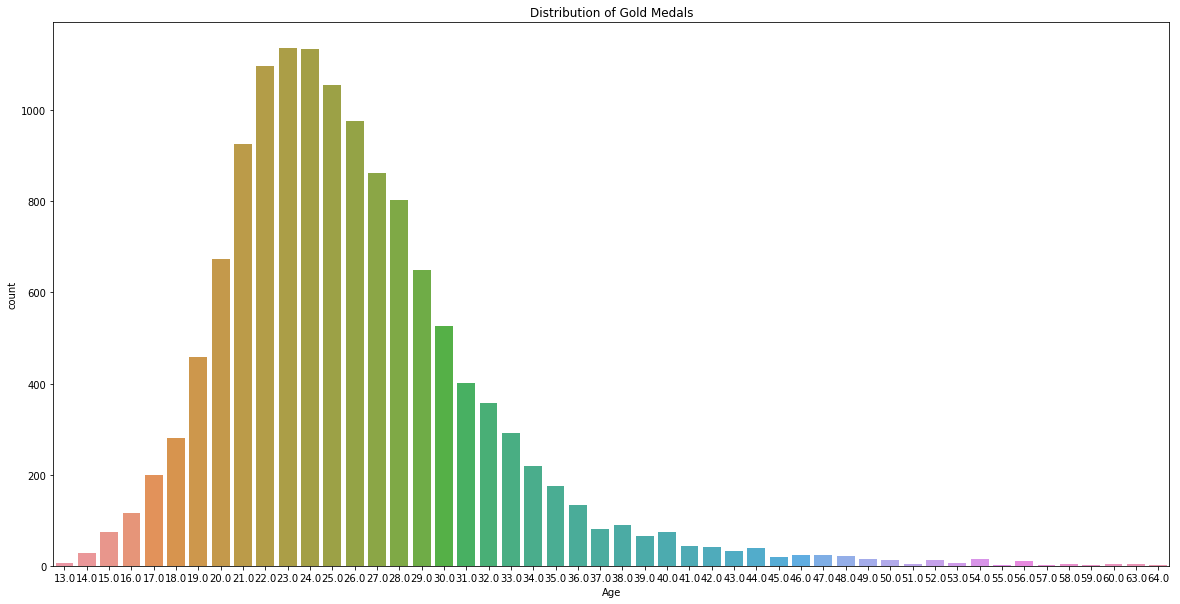

In [24]:
goldMedals = gold_total[np.isfinite(gold_total['Age'])]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_total['Age'])
plt.title('Distribution of Gold Medals')

In [25]:
print(goldMedals)


            ID                                       Name Sex   Age  Height  \
3            4                       Edgar Lindenau Aabye   M  34.0     NaN   
42          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
44          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
48          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
60          20                         Kjetil Andr Aamodt   M  20.0   176.0   
73          20                         Kjetil Andr Aamodt   M  30.0   176.0   
76          20                         Kjetil Andr Aamodt   M  30.0   176.0   
78          20                         Kjetil Andr Aamodt   M  34.0   176.0   
79          21                  Ragnhild Margrethe Aamodt   F  27.0   163.0   
113         40                            Roald Edgar Aas   M  31.0     NaN   
117         42                        Thomas Valentin Aas   M  25.0     NaN   
150         56                                 Ren A

In [26]:
sports = gold_total['Sport'][gold_total['Age']>50]
print(sports)

5078         Equestrianism
7961               Sailing
13394        Equestrianism
13396        Equestrianism
24897        Equestrianism
30323             Alpinism
38675        Equestrianism
41288              Sailing
42973              Sailing
51671              Sailing
63622              Sailing
73191              Sailing
78291        Equestrianism
104003    Art Competitions
105010             Curling
105199               Roque
107171             Sailing
110771       Equestrianism
121152       Equestrianism
131798    Art Competitions
132007             Sailing
134557            Shooting
139669       Equestrianism
159298            Shooting
163126            Shooting
163130            Shooting
167439       Equestrianism
168551            Shooting
169081       Equestrianism
169083       Equestrianism
                ...       
201402             Sailing
205344       Equestrianism
207970       Equestrianism
207971       Equestrianism
222155       Equestrianism
222156       Equestrianism
2

### 2.2 EDA on Winter Olympics

In [27]:
gold_winter = winter[(winter.Medal=='Gold')]
gold_winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
5,1924,Chamonix,Biathlon,Biathlon,"JULEN, Alphonse",SUI,Men,Military Patrol,Gold
6,1924,Chamonix,Biathlon,Biathlon,"JULEN, Ant.",SUI,Men,Military Patrol,Gold
7,1924,Chamonix,Biathlon,Biathlon,"VAUCHER, D.",SUI,Men,Military Patrol,Gold
17,1924,Chamonix,Bobsleigh,Bobsleigh,"NEVEU, Alfred",SUI,Men,Four-Man,Gold
18,1924,Chamonix,Bobsleigh,Bobsleigh,"SCHERRER, Eduard",SUI,Men,Four-Man,Gold
19,1924,Chamonix,Bobsleigh,Bobsleigh,"SCHLÄPPI, Alfred",SUI,Men,Four-Man,Gold
20,1924,Chamonix,Bobsleigh,Bobsleigh,"SCHLÄPPI, Heinrich",SUI,Men,Four-Man,Gold
31,1924,Chamonix,Curling,Curling,"AIKMAN, T.",GBR,Men,Curling,Gold
32,1924,Chamonix,Curling,Curling,"ASTLEY, D.-G.",GBR,Men,Curling,Gold


Text(0.5,1,'Distribution of Gold Medals')

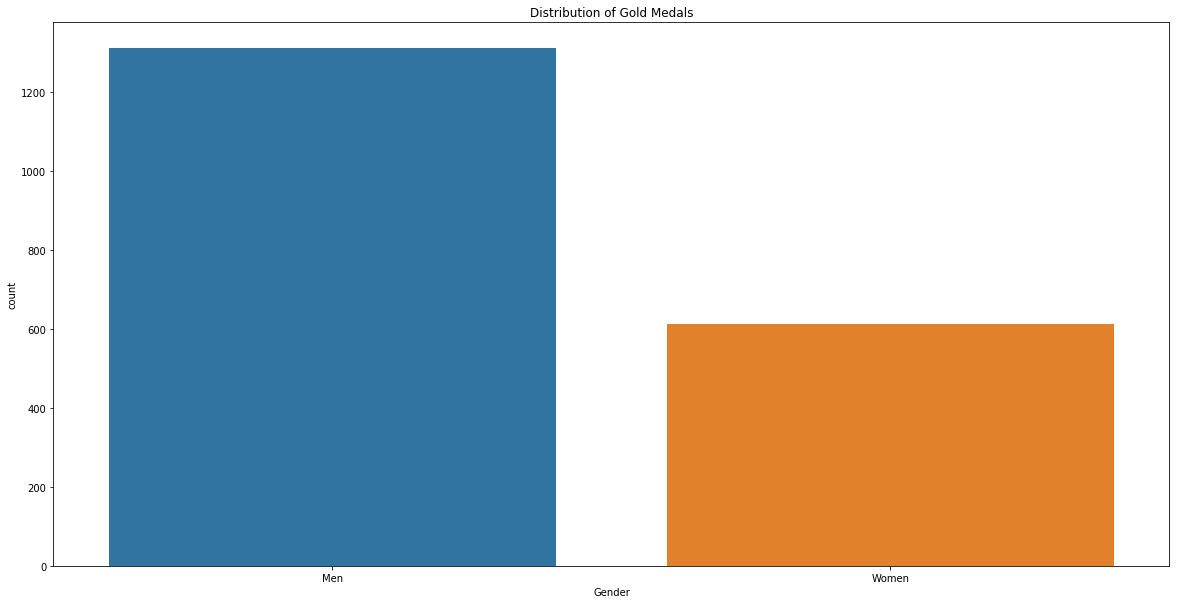

In [28]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_winter['Gender'])
plt.title('Distribution of Gold Medals')

In [29]:
gold_winter['Sport'].unique()

array(['Biathlon', 'Bobsleigh', 'Curling', 'Ice Hockey', 'Skating',
       'Skiing', 'Luge'], dtype=object)

Text(0.5,1,'Number of gold medals won over years')

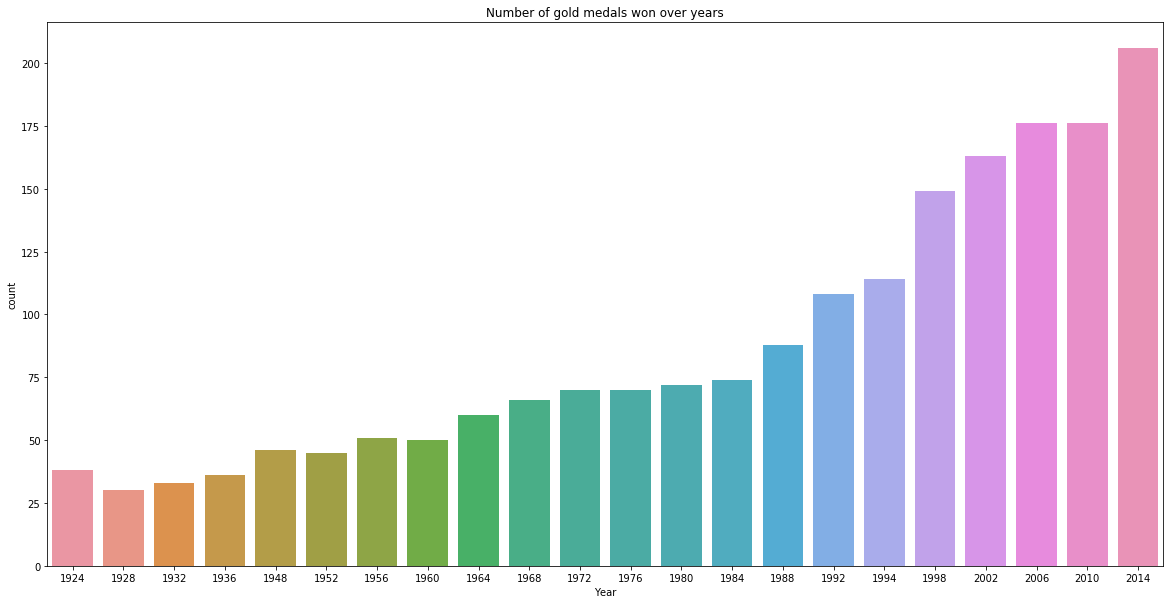

In [30]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x='Year', data=gold_winter)
plt.title("Number of gold medals won over years")

We see a gradual growth in the number of gold medals with every edition year in line with the increase of events.

In [31]:
wintercount=gold_winter.Sport.value_counts().reset_index(name='Medal').head()
wintercount

,index,Medal
0,Skiing,595
1,Ice Hockey,510
2,Skating,412
3,Bobsleigh,144
4,Biathlon,140


Text(0.5,1,'Number of Gold Medals for the top 5 sports')

<Figure size 3600x1440 with 0 Axes>

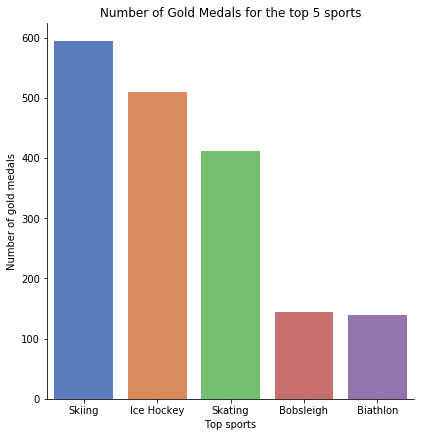

In [32]:
plt.figure(figsize=(50,20))
sns.catplot(x="index", y="Medal", data=wintercount,
                height=6, kind="bar", palette="muted")

plt.xlabel("Top sports")
plt.ylabel("Number of gold medals")
plt.title('Number of Gold Medals for the top 5 sports')

As we all know that winter olympics have very less number of sports compared to Summer Olympics, we infer that Skiing is the most popular Winter Olympic sport with maximum number of gold medals.

### 2.3 EDA on Women Athletes

In [33]:
##Lets first analyse women only in summer olympics 
womeninsummer = olympics[(olympics.Sex =='F') & (olympics.Season =='Summer')]
print(womeninsummer)

            ID                                      Name Sex   Age  Height  \
26           8        Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
27           8        Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
32          13                        Minna Maarit Aalto   F  30.0   159.0   
33          13                        Minna Maarit Aalto   F  34.0   159.0   
79          21                 Ragnhild Margrethe Aamodt   F  27.0   163.0   
80          22                             Andreea Aanei   F  22.0   170.0   
91          29                      Willemien Aardenburg   F  22.0     NaN   
105         37                        Ann Kristin Aarnes   F  23.0   182.0   
135         49                              Moonika Aava   F  24.0   168.0   
136         49                              Moonika Aava   F  28.0   168.0   
161         65                         Patimat Abakarova   F  21.0   165.0   
163         67   Mariya Vasilyevna Abakumova (-Tarabina)   F  22

Text(0.5,1,'Variation of Female Athletes over time')

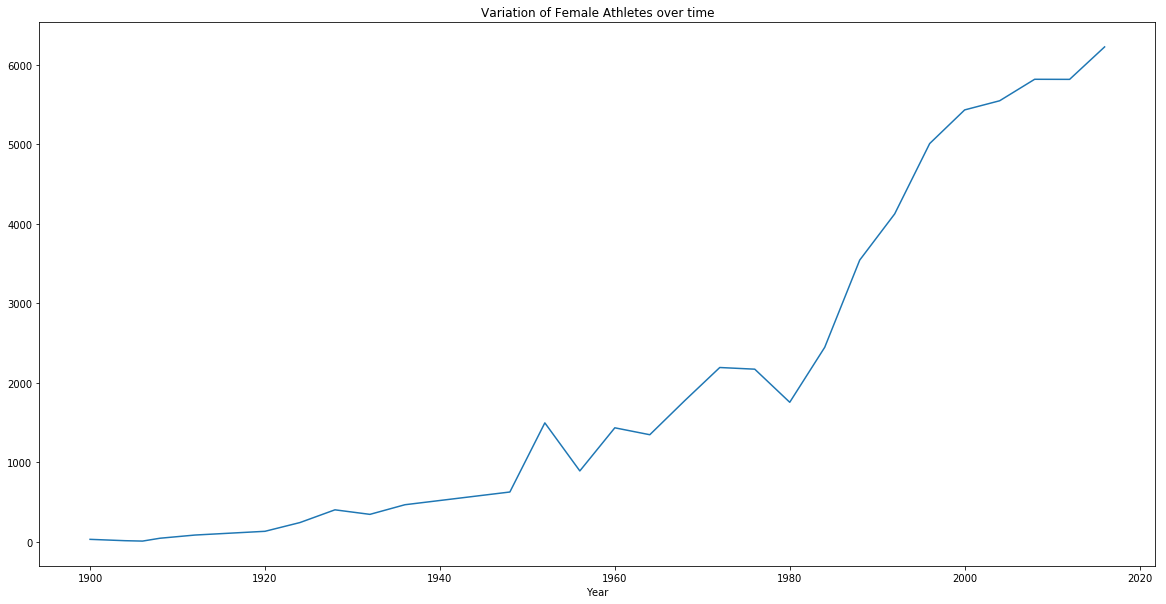

In [34]:
participation = womeninsummer.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
participation.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

We clearly can infer that there was almost no participation in the early years of Olympics and that there was a sudden increase in the number of women athletes from 1960s. 

In [35]:
womeninsummer.dropna()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NOR,1.640000e+11,4381336.0
161,65,Patimat Abakarova,F,21.0,165.0,49.0,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,AZE,3.784772e+10,9762274.0
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,RUS,1.660000e+12,142742350.0
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,Russia,RUS,5.910000e+11,144067054.0
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,USA,1.470000e+13,304093966.0
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,USA,1.230000e+13,292805298.0
476,259,Reema Abdo,F,21.0,173.0,59.0,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,Canada,CAN,3.550000e+11,25702000.0
677,394,Irene Abel,F,19.0,160.0,48.0,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver,Germany,DEU,2.990000e+11,78688452.0
684,395,Jennifer Abel,F,20.0,160.0,62.0,CAN,2012 Summer,2012,Summer,London,Diving,Diving Women's Synchronized Springboard,Bronze,Canada,CAN,1.820000e+12,34750545.0
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey,TUR,7.640000e+11,70440032.0


In [36]:
##Lets extract the rows with Gold medals 
goldsports =womeninsummer.loc[womeninsummer['Medal']=='Gold', ['Sport','Year']].drop_duplicates()
print(goldsports)


                      Sport  Year
79                 Handball  2008
283                    Golf  1900
1494                 Boxing  2012
1495                 Boxing  2016
1527              Athletics  2008
1528              Athletics  2012
1668             Volleyball  2012
1772               Swimming  2008
2005             Gymnastics  1984
2099                 Hockey  2008
2100                 Hockey  2012
2143                Fencing  1964
2173             Gymnastics  1928
2184             Volleyball  2000
2466               Swimming  1992
2577                 Rowing  1976
2815              Athletics  1996
2911               Football  1996
2929             Volleyball  1980
3020              Athletics  2016
3833                Sailing  2012
4380                 Rowing  1980
4835    Rhythmic Gymnastics  2008
4994              Triathlon  2004
4996                 Hockey  2000
5147               Swimming  1964
5148             Water Polo  2004
5457               Handball  2012
5826          

Text(0.5,1,'Number of gold medals won by women over years')

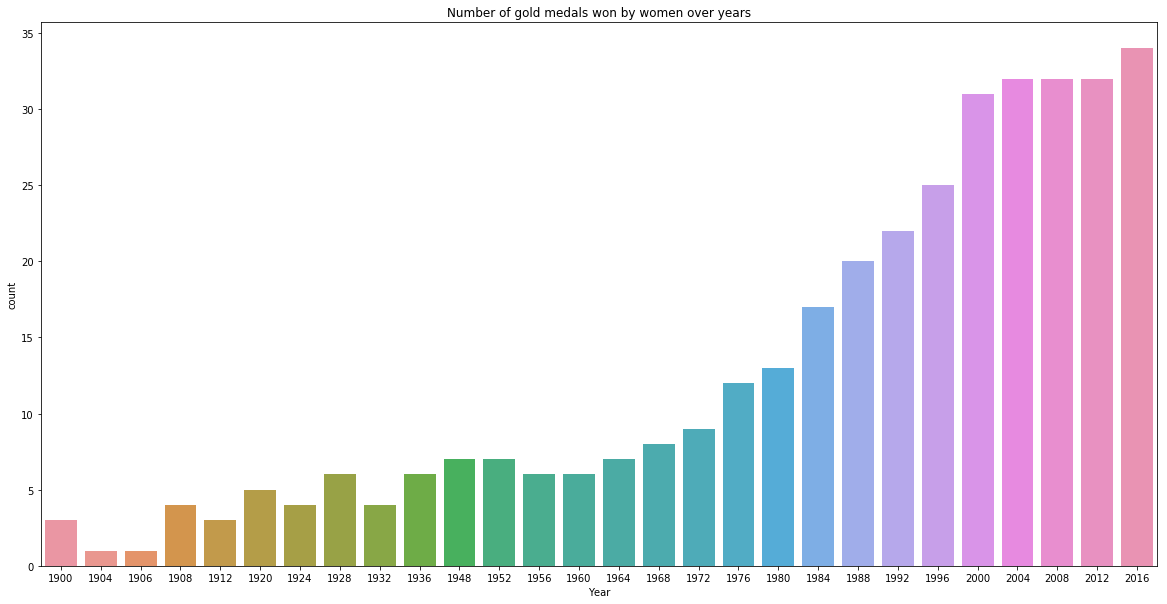

In [37]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x='Year', data=goldsports)
plt.title("Number of gold medals won by women over years")

/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,"Variation of women's weight over years")

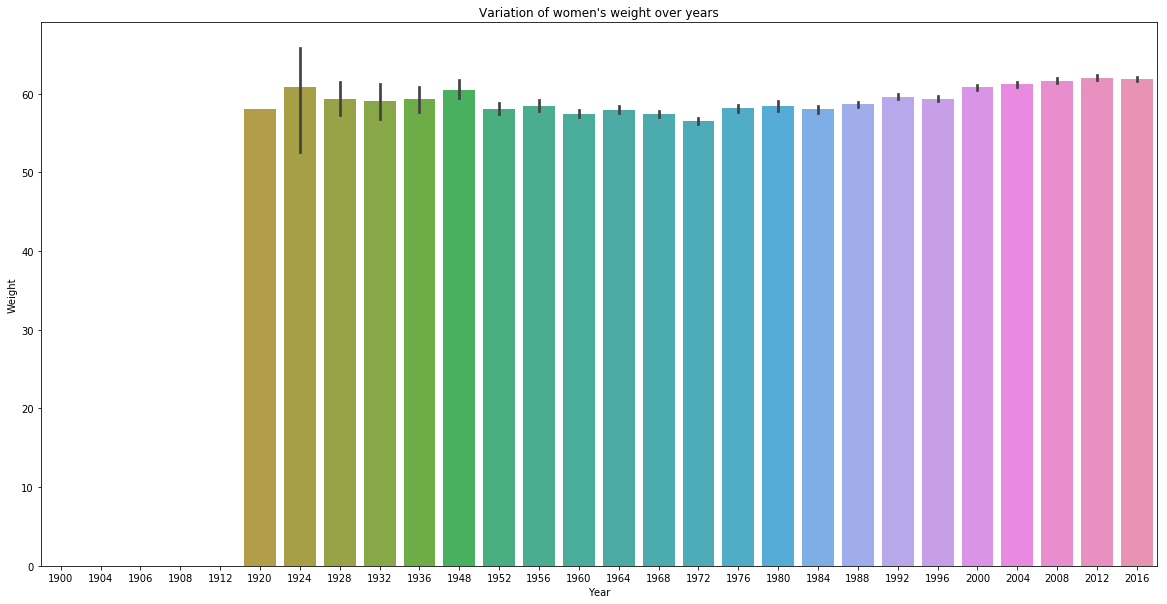

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Weight',data=womeninsummer)
plt.title("Variation of women's weight over years")

/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,"Variation of women's height over years")

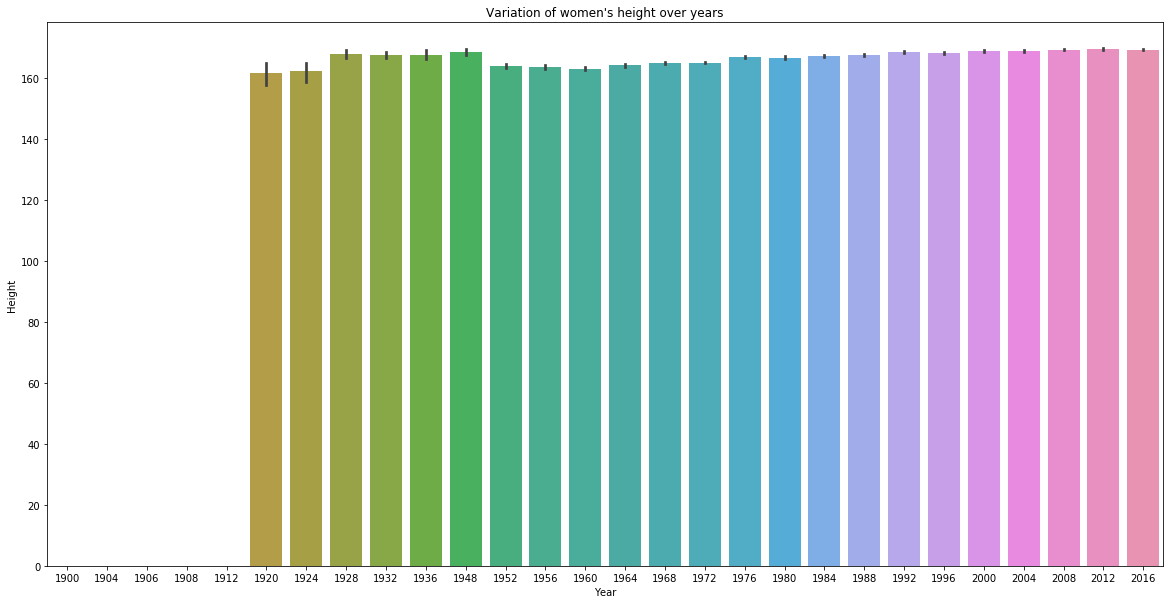

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Height',data=womeninsummer)
plt.title("Variation of women's height over years")

With the increase in women participation and gold medals over time, the one thing that remained constant was their weights and heights. It just makes us realise how they everyone is bound to be of a certain height and weight irrespective of the time! 

In [40]:
womengold = womeninsummer.loc[womeninsummer['Medal']=='Gold'].drop_duplicates()
print(womengold)

            ID                                               Name Sex   Age  \
79          21                          Ragnhild Margrethe Aamodt   F  27.0   
283        150                      Margaret Ives Abbott (-Dunne)   F  23.0   
1494       832                              Nicola Virginia Adams   F  29.0   
1495       832                              Nicola Virginia Adams   F  33.0   
1527       846               Valerie Kasanita Adams-Vili (-Price)   F  23.0   
1528       846               Valerie Kasanita Adams-Vili (-Price)   F  27.0   
1668       925                Adenzia Aparecida Ferreira da Silva   F  25.0   
1772       980                          Rebecca "Becky" Adlington   F  19.0   
1773       980                          Rebecca "Becky" Adlington   F  19.0   
2005      1109                           Lavinia Agache (-Carney)   F  16.0   
2099      1169                                   Marilyn Agliotti   F  29.0   
2100      1169                                   Mar

Text(0.5,1,"Variation in women's age who won gold medals over years")

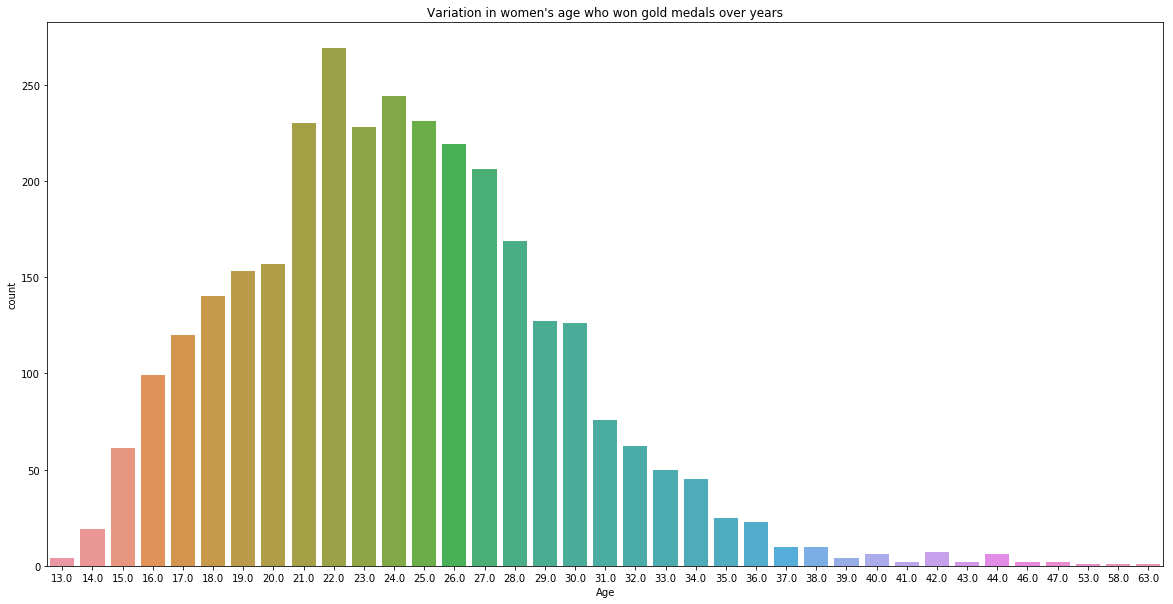

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', data=womengold)
plt.title("Variation in women's age who won gold medals over years")

We clearly see that most of the gold medals won by women was in their middle 20's, which is given beacuse that is the prime of our life where most of us are fit and healthy.

In [42]:
#Printing the number of gold medals won by each team over the years 
medals_agg = womengold.groupby(['Team','Year','Sport',])['Medal'].agg('count').reset_index()
medals_agg

,Team,Year,Sport,Medal
0,Algeria,1992,Athletics,1
1,Algeria,2000,Athletics,1
2,Argentina,2016,Judo,1
3,Argentina,2016,Sailing,1
4,Australia,1912,Swimming,1
5,Australia,1932,Swimming,1
6,Australia,1952,Athletics,3
7,Australia,1956,Athletics,7
8,Australia,1956,Swimming,8
9,Australia,1960,Swimming,1


In [43]:
##Lets see which countries won maximum number of medals 
goldcount=goldMedals.Team.value_counts().reset_index(name='Medal').head(10)
goldcount

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5,1,'Number of Gold Medals for the top 10 countries')

<Figure size 1440x720 with 0 Axes>

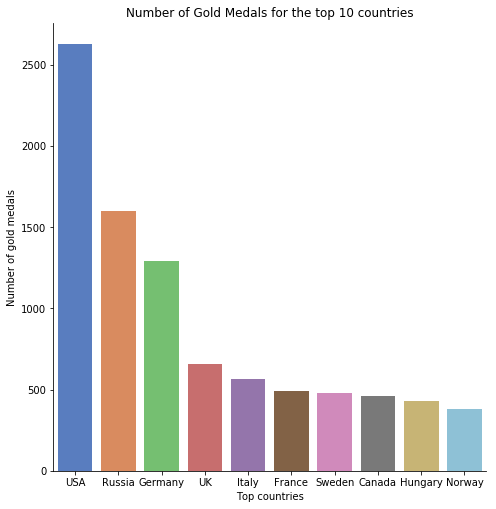

In [44]:
plt.figure(figsize=(20,10))
sns.catplot(x="index", y="Medal", data=goldcount,
                height=7, kind="bar", palette="muted")

plt.xlabel("Top countries")
plt.ylabel("Number of gold medals")
plt.title('Number of Gold Medals for the top 10 countries')

USA clearly has bee nin the lime light through out the Olympics. Let's analyse women from the USA now!

### 2.4 EDA on Women Athletes in the USA

Text(0.5,1,'gold medals from USA')

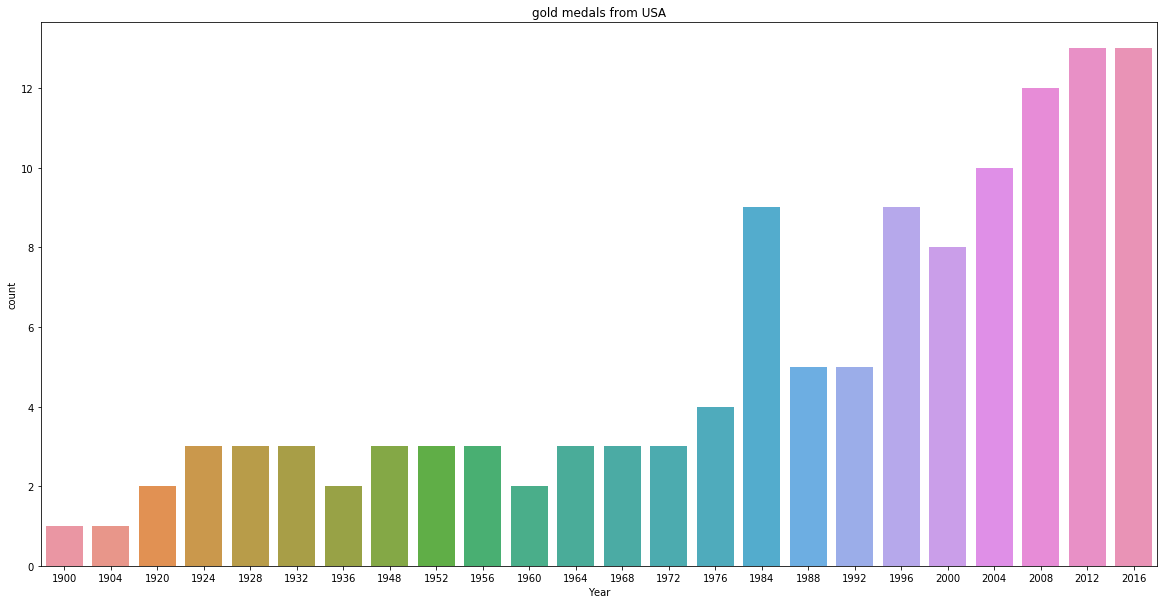

In [45]:
womenUSA = medals_agg.loc[medals_agg['Team']=='USA']
womenUSA
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenUSA)
plt.title("gold medals from USA")

In [46]:
womenUSall = womeninsummer.loc[womeninsummer['Team']=='USA',['Name','Age','Weight','Height','Year','Medal','Sport']]
womenUSall


,Name,Age,Weight,Height,Year,Medal,Sport
282,Mara Katherine Abbott,30.0,52.0,163.0,2016,NaN,Cycling
283,Margaret Ives Abbott (-Dunne),23.0,NaN,NaN,1900,Gold,Golf
284,Mary Perkins Ives Abbott (Perkins-),42.0,NaN,NaN,1900,NaN,Golf
286,Monica Cecilia Abbott,23.0,88.0,191.0,2008,Silver,Softball
311,Nia Nicole Abdallah,20.0,56.0,175.0,2004,Silver,Taekwondo
671,Brooke Abel,20.0,52.0,163.0,2008,NaN,Synchronized Swimming
874,Cheryl Abplanalp,24.0,68.0,174.0,1996,NaN,Handball
1312,"Amelia Lynn ""Amy"" Acuff (-Harvey)",21.0,66.0,188.0,1996,NaN,Athletics
1313,"Amelia Lynn ""Amy"" Acuff (-Harvey)",25.0,66.0,188.0,2000,NaN,Athletics
1314,"Amelia Lynn ""Amy"" Acuff (-Harvey)",29.0,66.0,188.0,2004,NaN,Athletics


Text(0.5,1,'Variation of age over time in USA women athletes')

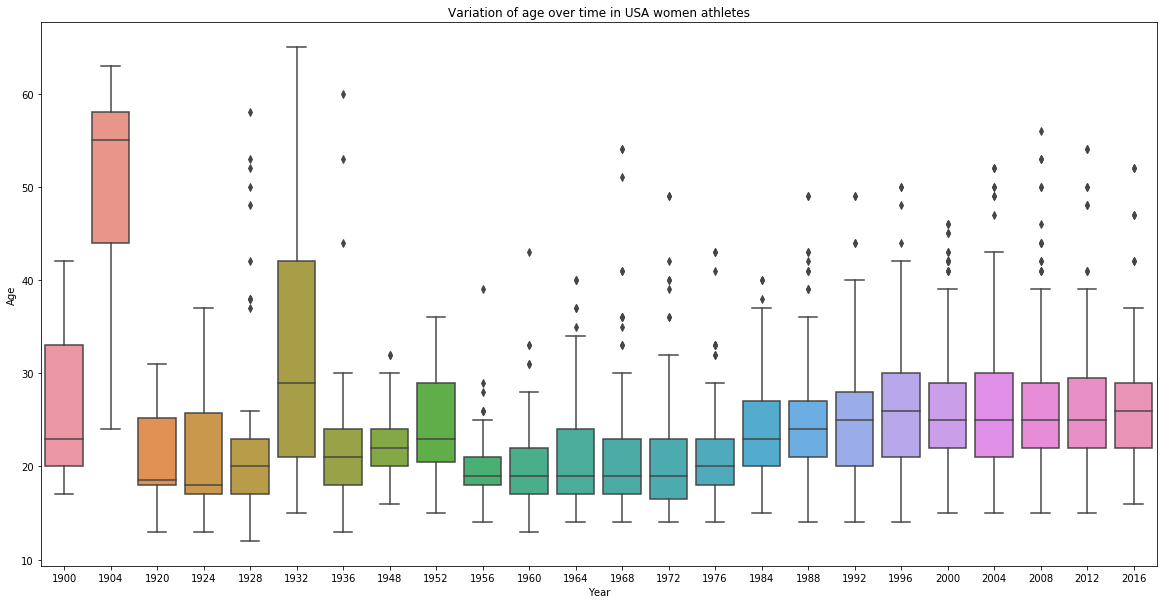

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Year", y="Age", data=womenUSall)
plt.title("Variation of age over time in USA women athletes")

Text(0.5,1,'Variation of weight over time in USA women athletes')

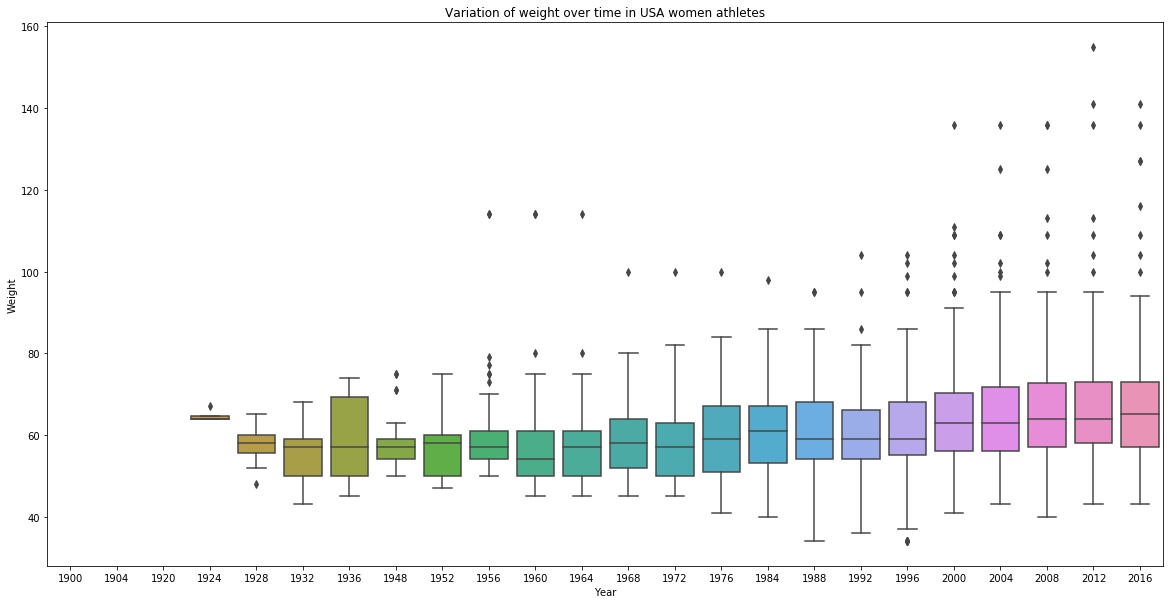

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Year", y="Weight", data=womenUSall)
plt.title("Variation of weight over time in USA women athletes")

In [49]:
## Lets extract the rows only with Gymanstics sports
womenGymn = womenUSall.loc[(womenUSall['Sport']=='Gymnastics')].drop_duplicates()
print(womenGymn)

                                                Name   Age  Weight  Height  \
12869     Ladislava Aloisie "Laddie" Bakanic (Hniz-)  24.0     NaN     NaN   
14848                  Marian Emma Barone (Twining-)  24.0     NaN     NaN   
14849                  Marian Emma Barone (Twining-)  28.0     NaN     NaN   
21200                       Mohini Bhardwaj (-Barry)  25.0    43.0   147.0   
21201                       Mohini Bhardwaj (-Barry)  25.0    43.0   147.0   
21745               Pamela Jean "Pam" Bileck (-Flat)  15.0    43.0   153.0   
21746               Pamela Jean "Pam" Bileck (-Flat)  15.0    43.0   153.0   
21758                           Simone Arianne Biles  19.0    47.0   143.0   
21762                           Simone Arianne Biles  19.0    47.0   143.0   
21763                           Simone Arianne Biles  19.0    47.0   143.0   
25692              Amanda Kathleen Borden (-Cochran)  19.0     NaN     NaN   
25693              Amanda Kathleen Borden (-Cochran)  19.0     N

/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variation of weight over time in women who participated in Gymnastics')

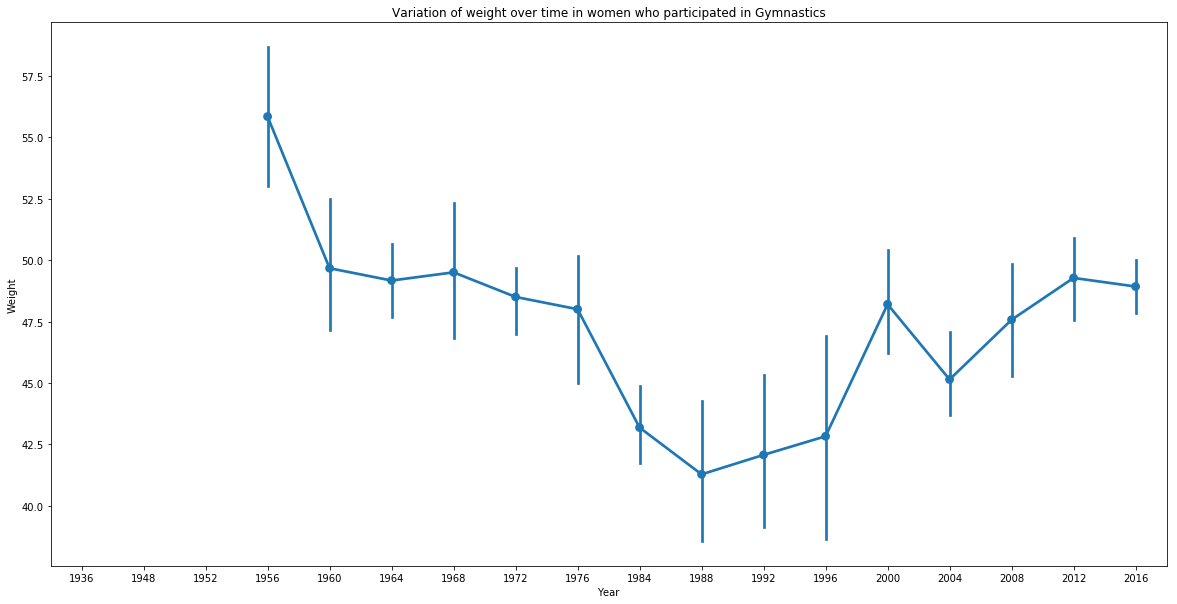

In [50]:
plt.figure(figsize=(20,10))
sns.pointplot(x='Year', y ='Weight', data= womenGymn, palletee='Set2')
plt.title("Variation of weight over time in women who participated in Gymnastics")

/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variation of height over time in women who participated in swimming')

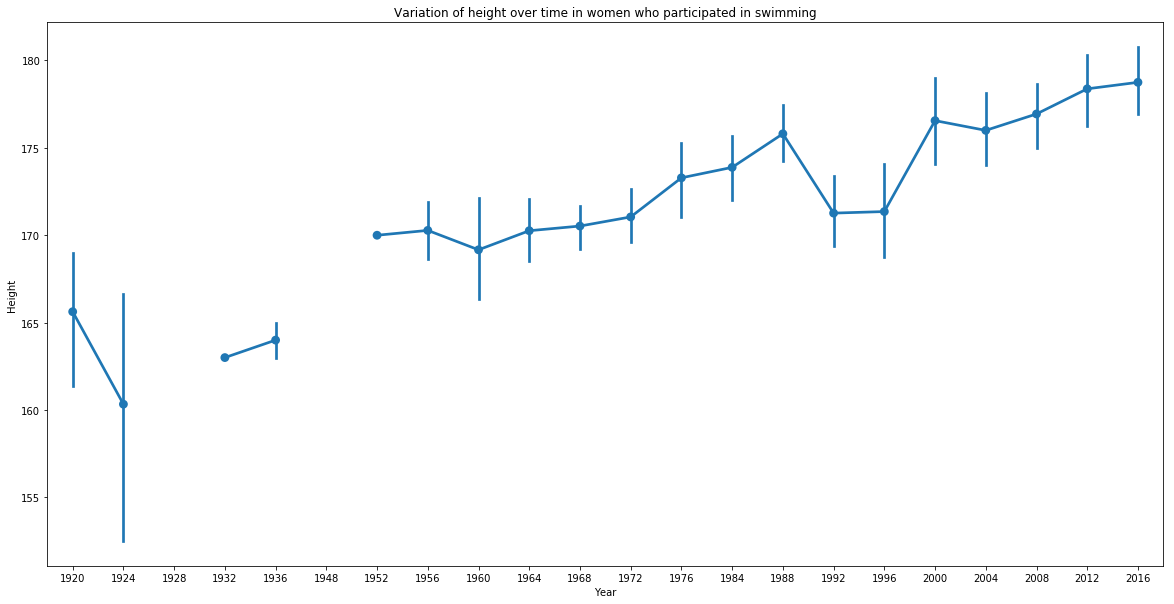

In [51]:
womenSwimming =womenUSall.loc[womenUSall['Sport']=='Swimming'].drop_duplicates()
plt.figure(figsize=(20,10))
sns.pointplot(x='Year', y ='Height', data= womenSwimming, palletee='Set2')
plt.title("Variation of height over time in women who participated in swimming")

In [52]:
womenUSAll=womenUSall.dropna()
womenUSAll
womensport=womenUSAll.Sport.value_counts().reset_index(name='Medal').head()
womensport

,index,Medal
0,Swimming,412
1,Athletics,225
2,Basketball,119
3,Gymnastics,83
4,Rowing,82


Text(0.5,1,'Top 5 sports in which USA women won most medals')

<Figure size 1440x720 with 0 Axes>

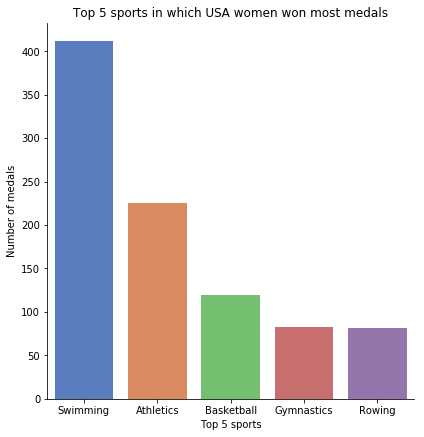

In [53]:
plt.figure(figsize=(20,10))
sns.catplot(x="index", y="Medal", data=womensport,
                height=6, kind="bar", palette="muted")

plt.xlabel("Top 5 sports")
plt.ylabel("Number of medals")
plt.title("Top 5 sports in which USA women won most medals")

We see that swimming has been a scorer to the USA women through out.

In [54]:
goldMedals = olympics[(olympics.Medal =='Gold')]
goldMedals

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,FIN,NaN,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,FIN,NaN,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,FIN,NaN,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.310000e+11,4.286401e+06
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.950000e+11,4.538159e+06
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NOR,1.950000e+11,4.538159e+06
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,3.450000e+11,4.660677e+06
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NOR,4.630000e+11,4.768212e+06
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,Norway,NOR,5.163272e+09,3.581239e+06


In [55]:
athletecount=olympics.Team.value_counts().reset_index(name='Name').head(5).drop_duplicates()

In [56]:
athletecount

,index,Name
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692


In [57]:
medalcount = olympics.Team.value_counts().reset_index(name="Medal").head(5)
medalcount

,index,Medal
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692


### 3.  Correlation between GDP of a country and the number of medals they won 

In [58]:
##Since the entire Olympics data is humongous, lets take data for the years 1970,1980,1990,2000 and 2010 
##for the top 5 countries
Olympics_complete = olympics.dropna()
Olympics_complete
years=['1970','1980','1990','2000','2010']
top_countries = ['USA','Germany','France','UK', 'Russia']
year_team_gdp = Olympics_complete.loc[(Olympics_complete['Year'].isin(years))&(Olympics_complete['Team'].isin(top_countries)),['Year','Team','GDP','Medal']]

year_team_gdp

,Year,Team,GDP,Medal
609,2000,USA,1.030000e+13,Gold
739,2000,USA,1.030000e+13,Gold
892,1980,UK,5.650000e+11,Bronze
1490,1980,UK,5.650000e+11,Silver
1720,2010,Germany,3.420000e+12,Silver
2465,2000,Germany,1.950000e+12,Bronze
2689,2000,UK,1.650000e+12,Gold
2696,2000,USA,1.030000e+13,Gold
3048,2000,Russia,2.600000e+11,Bronze
4130,1980,Germany,9.470000e+11,Bronze


In [59]:
##Lests count the number of medals won using the 'agg(count)' function
gdp_medals = olympics.groupby(['Team','Year','GDP'])['Medal'].agg('count').reset_index()
gdp_medals

,Team,Year,GDP,Medal
0,Afghanistan,1960,5.377778e+08,0
1,Afghanistan,1964,8.000000e+08,0
2,Afghanistan,1968,1.373333e+09,0
3,Afghanistan,1972,1.595555e+09,0
4,Afghanistan,1980,3.641723e+09,0
5,Afghanistan,2004,5.285466e+09,0
6,Afghanistan,2008,1.019053e+10,1
7,Afghanistan,2012,2.053654e+10,1
8,Afghanistan,2016,1.946902e+10,0
9,Albania,1992,7.094526e+08,0


/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([[1.        , 0.53470283],
       [0.53470283, 1.        ]])

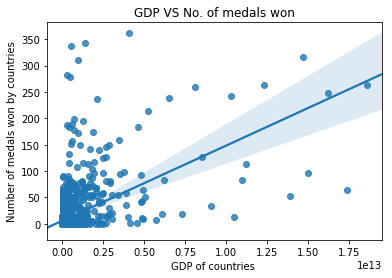

In [60]:
gdp = gdp_medals['GDP']
medals = gdp_medals['Medal']
correlation=np.corrcoef(gdp, medals)
correlation

sns.regplot(x='GDP',y='Medal',data=gdp_medals)
plt.xlabel("GDP of countries ")
plt.ylabel("Number of medals won by countries")
plt.title("GDP VS No. of medals won")
correlation


It shows a correlation of 53.4% which is significant. So GDP of a country does have a significant impact on it's scope of winning a medal.

###  6. Correlation between population of a country and the number of medals they won 

In [61]:
pop_medals = Olympics_complete.groupby(['Team','Year','Population'])['Medal'].agg('count').reset_index()
pop_medals

,Team,Year,Population,Medal
0,Afghanistan,2008,27294031.0,1
1,Afghanistan,2012,30696958.0,1
2,Algeria,1992,27181094.0,2
3,Algeria,1996,29411415.0,3
4,Algeria,2000,31183660.0,5
5,Algeria,2008,34860715.0,2
6,Algeria,2012,37565847.0,1
7,Algeria,2016,40606052.0,2
8,Argentina,1964,21953929.0,1
9,Argentina,1968,23261278.0,2


/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([[1.        , 0.21599782],
       [0.21599782, 1.        ]])

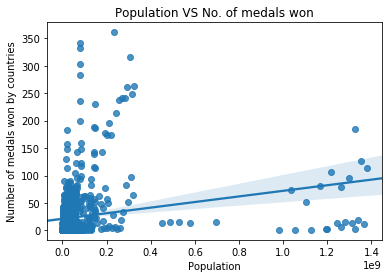

In [62]:
pop = pop_medals['Population']
medals = pop_medals['Medal']
correlation=np.corrcoef(pop, medals)
correlation

sns.regplot(x='Population',y='Medal',data=pop_medals)
plt.xlabel("Population")
plt.ylabel("Number of medals won by countries")
plt.title("Population VS No. of medals won")
correlation

It shows a correlation of 21%. Which is not so significant. 
Therefore, we can conclude that Population of a country does NOT have a significant impact on its scope of winning a medal. This makes sense because for example, countries like India which is so densly populated, the number of medals won over the years is very less, which could be a strong argument for our question.

### 5. Finding whether teams enjoy a home team advantage

In [63]:
Olympics_complete

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,FIN,2.730000e+11,5461512.0
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.310000e+11,4286401.0
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,NOR,1.310000e+11,4286401.0
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NOR,1.270000e+11,4336613.0
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,NOR,1.270000e+11,4336613.0
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway,NOR,1.270000e+11,4336613.0
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.950000e+11,4538159.0
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NOR,1.950000e+11,4538159.0
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,3.450000e+11,4660677.0
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands,NLD,4.460000e+11,15530498.0


In [64]:
##Lets take in the values from the 1964-2016.
Olympics_=Olympics_complete.loc[(Olympics_complete['Year'] > 1960) & (Olympics_complete['Season']=='Summer'), :]
#olympics_=olympics_merge.loc[(olympics_merge['Year'] > 1960) & (olympics_complete['Season'] == "Summer"), :]
Olympics_[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
525,1964,Tokyo
2478,1968,Mexico City
677,1972,Munich
1238,1976,Montreal
188,1980,Moskva
191,1984,Los Angeles
218,1988,Seoul
208,1992,Barcelona
92,1996,Atlanta
178,2000,Sydney


Here it is! We have the Olympic year and the city where they were conducted. Now lets map the city names with their host_country names. 

In [65]:
host_country = {'Tokyo': 'Japan','Mexico City': 'Mexico','Munich': 'Germany','Montreal': 'Canada','Moskva': 
                'Russia','Los Angeles': 'USA', 'Seoul': 'South Korea', 'Barcelona': 'Spain','Atlanta': 'USA',
                'Sydney': 'Australia', 'Athina': 'Greece','Beijing': 'China',
                'London': 'UK','Rio de Janeiro': 'Brazil'}

##Adding one more column to olympics_ data - "host_country"
Olympics_['Host Country'] = Olympics_['City'].map(host_country)

#print a table with year in which Olymics were held and the host country
Olympics_.loc[:, ['Year', 'Host Country']].drop_duplicates().sort_values('Year')


/Users/Aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Year,Host Country
525,1964,Japan
2478,1968,Mexico
677,1972,Germany
1238,1976,Canada
188,1980,Russia
191,1984,USA
218,1988,South Korea
208,1992,Spain
92,1996,USA
178,2000,Australia


In [66]:
Olympics_

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population,Host Country
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands,NLD,4.460000e+11,15530498.0,USA
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NOR,1.640000e+11,4381336.0,USA
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,ITA,1.860000e+12,60600590.0,Brazil
159,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,ESP,1.640000e+12,45954106.0,China
161,65,Patimat Abakarova,F,21.0,165.0,49.0,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,AZE,3.784772e+10,9762274.0,Brazil
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,RUS,1.660000e+12,142742350.0,China
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus,BLR,6.076348e+10,9527985.0,China
173,73,Luc Abalo,M,23.0,182.0,86.0,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,FRA,2.920000e+12,64374990.0,China
174,73,Luc Abalo,M,27.0,182.0,86.0,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,FRA,2.680000e+12,65659790.0,UK
175,73,Luc Abalo,M,31.0,182.0,86.0,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France,FRA,2.470000e+12,66896109.0,Brazil


In [67]:
##Create a new data frame with only year, Team, Host Country and the number of medals won
olympics_host = Olympics_[['Year','Team','Host Country','Medal']].drop_duplicates().sort_values('Year')
olympics_host

,Year,Team,Host Country,Medal
154144,1964,Ireland,Japan,Bronze
21654,1964,UK,Japan,Gold
21012,1964,Netherlands,Japan,Bronze
113165,1964,Turkey,Japan,Bronze
7833,1964,Italy,Japan,Gold
20614,1964,Italy,Japan,Bronze
20490,1964,Australia,Japan,Gold
11432,1964,Turkey,Japan,Silver
92453,1964,Iran,Japan,Bronze
20409,1964,Denmark,Japan,Gold


Here the medals values are gold,silver/bronze. We need a count of all the medals for each year. 
Before doing that, let's reset the index of olympics_host!

In [68]:
olympics_host.reset_index(drop=True,inplace=True)
olympics_host

,Year,Team,Host Country,Medal
0,1964,Ireland,Japan,Bronze
1,1964,UK,Japan,Gold
2,1964,Netherlands,Japan,Bronze
3,1964,Turkey,Japan,Bronze
4,1964,Italy,Japan,Gold
5,1964,Italy,Japan,Bronze
6,1964,Australia,Japan,Gold
7,1964,Turkey,Japan,Silver
8,1964,Iran,Japan,Bronze
9,1964,Denmark,Japan,Gold


In [69]:
#Generate the count of medals won by each country in each olympic game
olympics_medal_host = olympics_host.groupby(['Year','Team','Host Country'])['Medal'].agg('count').reset_index()
olympics_medal_host

,Year,Team,Host Country,Medal
0,1964,Argentina,Japan,1
1,1964,Australia,Japan,3
2,1964,Bahamas,Japan,1
3,1964,Belgium,Japan,2
4,1964,Brazil,Japan,1
5,1964,Canada,Japan,3
6,1964,Denmark,Japan,3
7,1964,Finland,Japan,2
8,1964,France,Japan,3
9,1964,Ghana,Japan,1


Here it is! We have the data framwe Olympics_medal_host with for attributes - Year, Team, Host country and the number of medals won by each team in that particular year. 

In [70]:
medals_count = Olympics_.groupby(['Year','Team'])['Medal'].agg('count').reset_index()
medals_count

,Year,Team,Medal
0,1964,Argentina,1
1,1964,Australia,37
2,1964,Bahamas,2
3,1964,Belgium,3
4,1964,Brazil,12
5,1964,Canada,5
6,1964,Denmark,12
7,1964,Finland,5
8,1964,France,31
9,1964,Ghana,1


In [71]:
Olympics_host= Olympics_.groupby(['Year', 'Host Country', 'Team'])['Medal'].agg('count').reset_index().drop_duplicates()

# check rows where host country is the same as team
row_mask_4 = (Olympics_host['Host Country'] == Olympics_host['Team'])

#Add two columns - Prev_year and next_year
Olympics_host['Prev_Year'] = Olympics_host['Year'] - 4
Olympics_host['Next_Year'] = Olympics_host['Year'] + 4

# Subset only where host nation and team were the same
host_team_subset= Olympics_host[row_mask_4]
#Re-ordering and re-naming the columns 
Olympics_host.sort_values('Year', ascending = True, inplace = True)
Olympics_host.reset_index(drop=True,inplace=True)
#Olympics_host.rename(columns={'Medal':'Number of medals: Host Year'})


In [72]:
host_team_subset.reset_index(drop=True,inplace=True)
host_team_subset

,Year,Host Country,Team,Medal,Prev_Year,Next_Year
0,1964,Japan,Japan,62,1960,1968
1,1968,Mexico,Mexico,9,1964,1972
2,1972,Germany,Germany,253,1968,1976
3,1976,Canada,Canada,20,1972,1980
4,1984,USA,USA,352,1980,1988
5,1988,South Korea,South Korea,77,1984,1992
6,1992,Spain,Spain,43,1988,1996
7,1996,USA,USA,241,1992,2000
8,2000,Australia,Australia,183,1996,2004
9,2004,Greece,Greece,31,2000,2008


We notice that the data for year 1980 is missing from the dataset, which was also the year when USA boycotted the game.

Here we have columns - Year, Host Country, Team, Medal. Medal represents the number of medals won in that particular year which is the host year. 
So, next let's find out the number of medals won in the prev year and in the next year so that we can compare the outcomes with the host year and see if teams actually enjoy home ground advantage.

In [73]:
##Calculating the number of medals won in the next year
Olympics_host_medal = host_team_subset.merge(medals_count,
                                         left_on=['Prev_Year','Team'],
                                         right_on =['Year','Team'],
                                         how='left') 

##Calculating the number of medals won in the next year
Olympics_host_medal= Olympics_host_medal.merge(medals_count,
                                         left_on=['Next_Year','Team'],
                                         right_on =['Year','Team'],
                                         how='left') 
Olympics_host_medal.drop(['Year'],axis=1,inplace=True)


Olympics_host_medal

,Year_x,Host Country,Team,Medal_x,Prev_Year,Next_Year,Year_y,Medal_y,Medal
0,1964,Japan,Japan,62,1960,1968,NaN,NaN,63.0
1,1968,Mexico,Mexico,9,1964,1972,1964.0,1.0,1.0
2,1972,Germany,Germany,253,1968,1976,NaN,NaN,269.0
3,1976,Canada,Canada,20,1972,1980,1972.0,11.0,NaN
4,1984,USA,USA,352,1980,1988,NaN,NaN,207.0
5,1988,South Korea,South Korea,77,1984,1992,1984.0,41.0,21.0
6,1992,Spain,Spain,43,1988,1996,1988.0,5.0,65.0
7,1996,USA,USA,241,1992,2000,1992.0,223.0,241.0
8,2000,Australia,Australia,183,1996,2004,1996.0,130.0,157.0
9,2004,Greece,Greece,31,2000,2008,2000.0,18.0,7.0


So here it is! We have values for num of medals won in the previous year and als othe next year. 
But we observe that there are few unnecessary columns, lets drop them and rename the columns for better reading! 


In [74]:
Olympics_host_medal.rename(columns={'Year_x':'Host Year',
                                    'Medal_x':'Medals: Host Year',
                                    'Medal_y':'Medals: Prev Year',
                                    'Medal': 'Medals: Next Year'}, inplace=True)
Olympics_host_medal.drop(['Prev_Year','Next_Year','Year_y'],axis=1,inplace=True)
Olympics_host_medal

,Host Year,Host Country,Team,Medals: Host Year,Medals: Prev Year,Medals: Next Year
0,1964,Japan,Japan,62,NaN,63.0
1,1968,Mexico,Mexico,9,1.0,1.0
2,1972,Germany,Germany,253,NaN,269.0
3,1976,Canada,Canada,20,11.0,NaN
4,1984,USA,USA,352,NaN,207.0
5,1988,South Korea,South Korea,77,41.0,21.0
6,1992,Spain,Spain,43,5.0,65.0
7,1996,USA,USA,241,223.0,241.0
8,2000,Australia,Australia,183,130.0,157.0
9,2004,Greece,Greece,31,18.0,7.0


Finally!!! Here it is - The final ddata frame which compares the number of medals won by a Host country in its host year and the other two years for comparison. We clearly see that most of the teams when played in their home country has achieved more medals than the previous and after years. Let's plot a graph for clear understanding.

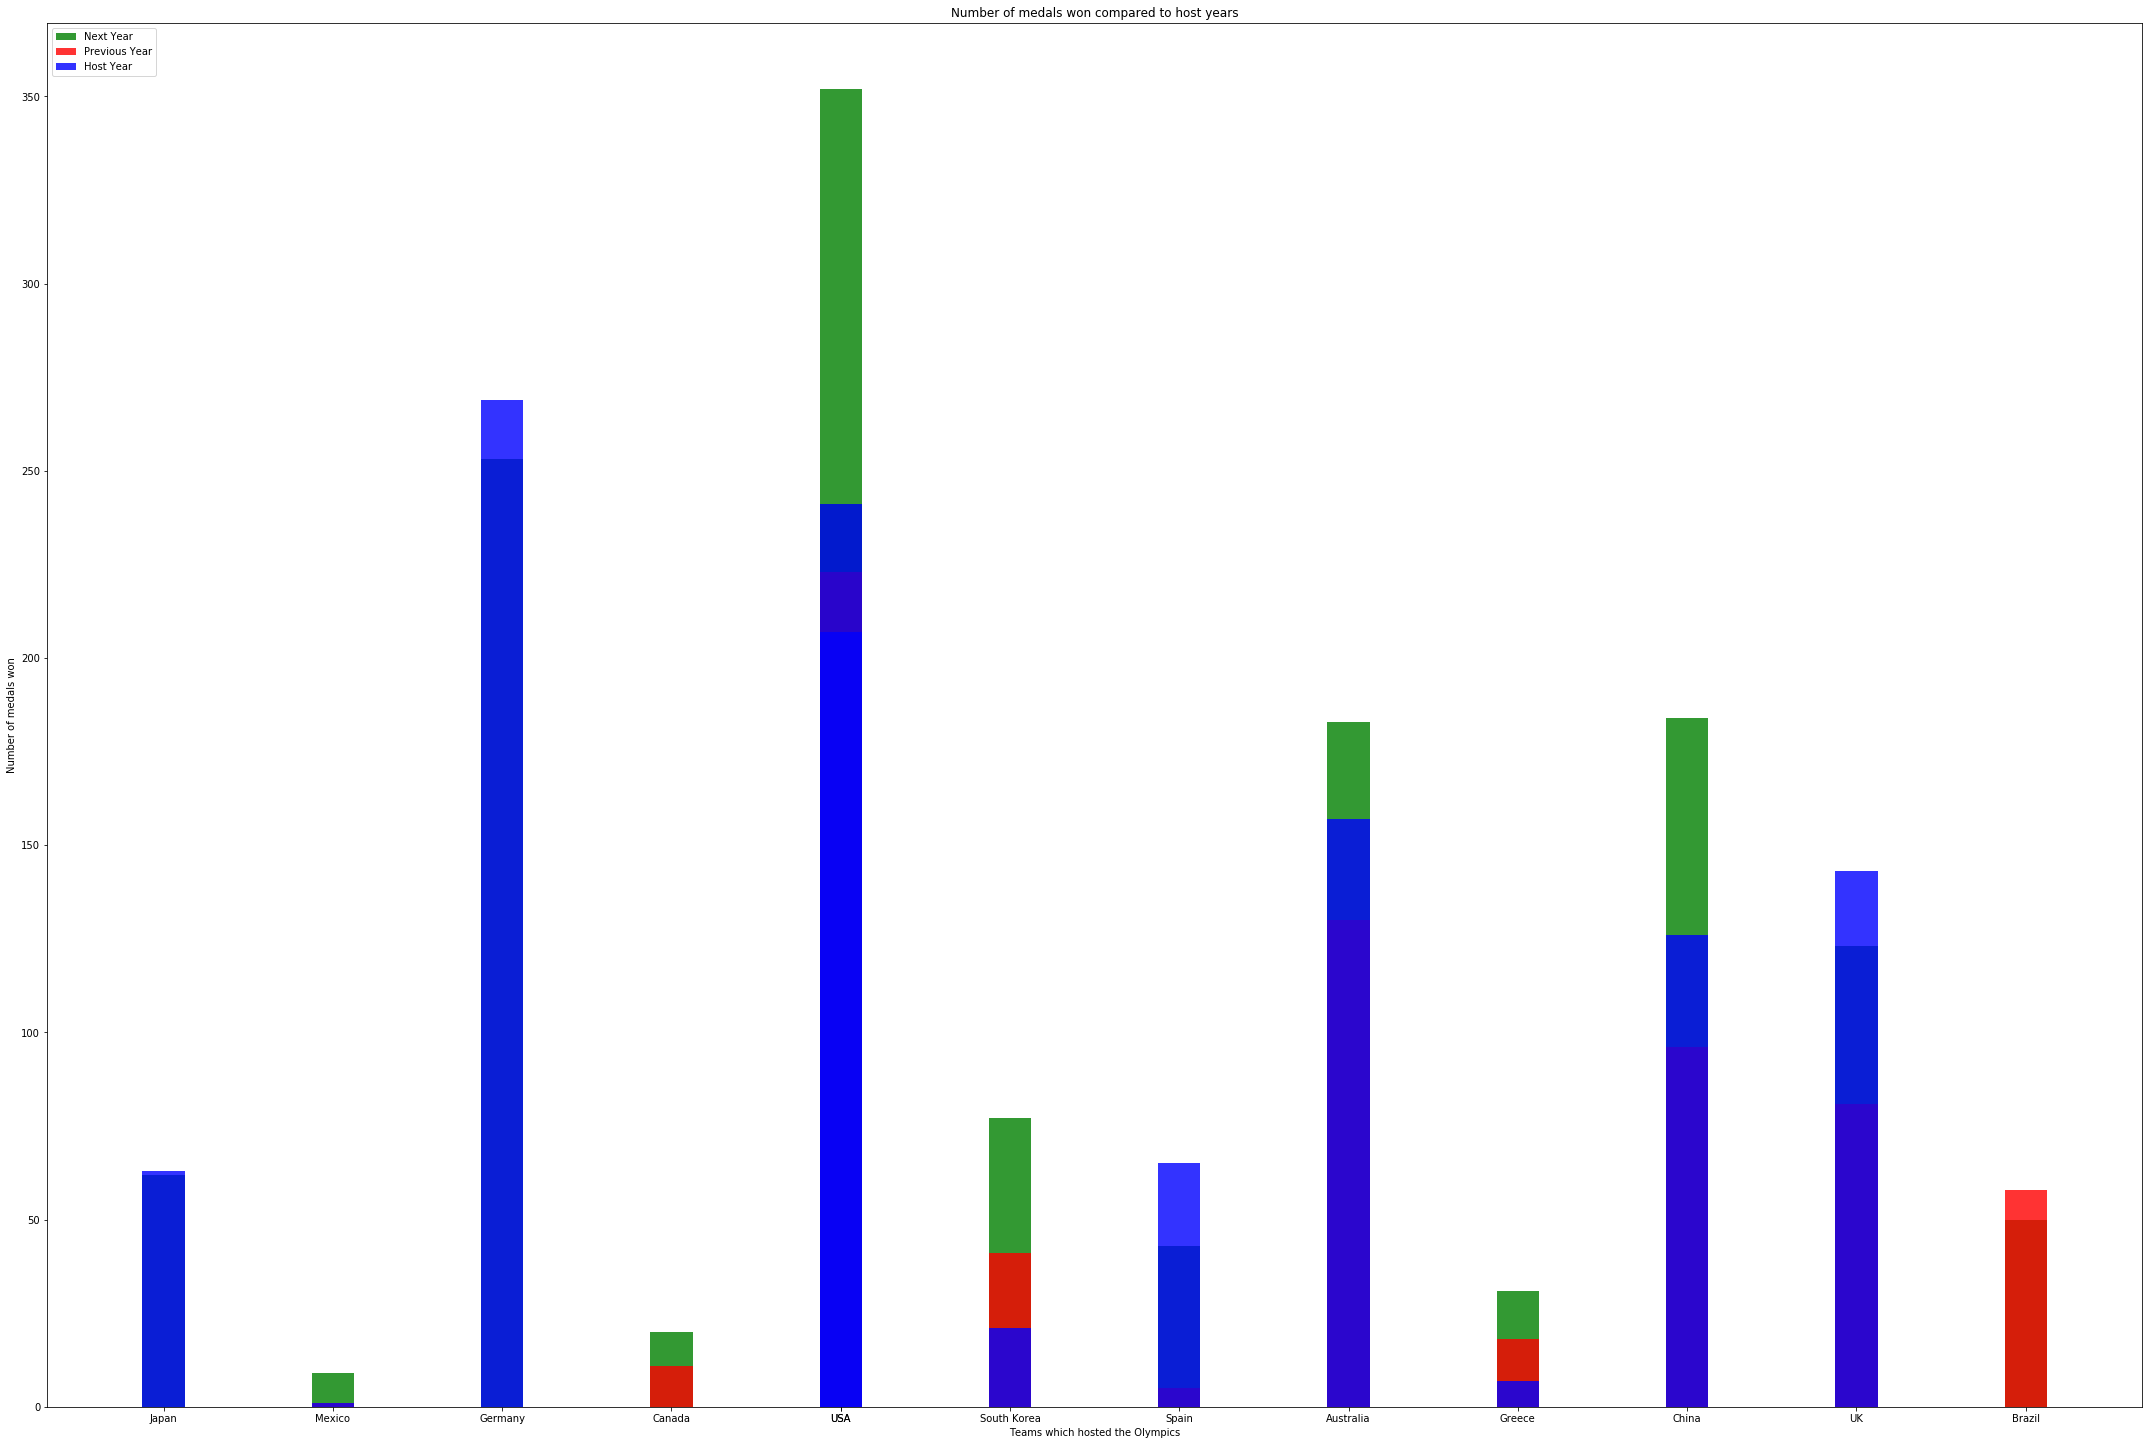

In [75]:
Host_countries = list(Olympics_host_medal['Team']) 
fig, ax = plt.subplots(figsize=(30,20))
width = 0.25 
opacity=0.8
plt.bar(Host_countries, Olympics_host_medal['Medals: Host Year'], 
        width, 
        alpha=opacity, 
        color='g', 
        label='Host Year') 
plt.bar(Host_countries, Olympics_host_medal['Medals: Prev Year'], 
        width, 
        alpha=opacity, 
        color='r', 
        label='Prev Year')
width1= 0.50
plt.bar(Host_countries, Olympics_host_medal['Medals: Next Year'], 
        width, 
        alpha=opacity, 
        color='b', 
        label='Next Year') 
ax.set_xlabel('Teams which hosted the Olympics')
ax.set_ylabel('Number of medals won')
plt.xticks(Host_countries)
plt.tight_layout()
ax.set_title("Number of medals won compared to host years")
plt.legend(['Next Year', 'Previous Year', 'Host Year'], loc='upper left')
plt.show()

Observing this, we clearly see that there is a home team adavantage. But this cannot be generalised as we can see that most of the host countries were developed nations and also which have been winning significantly through out the olympics. This is a prefect example of  "Correlation is not causation" 

### 6. Predicting whether a team wins a gold/silver/bronze given the team name and the sport using Random Forest Classifier

In [76]:
Olympics_complete.columns
Olympics_complete.shape

(23212, 18)

In [77]:
##Let's take the dataframe Olympics_complete which includes all seasons(summer&winter), from 1960
Olympics_complete

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,FIN,2.730000e+11,5461512.0
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.310000e+11,4286401.0
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,NOR,1.310000e+11,4286401.0
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NOR,1.270000e+11,4336613.0
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,NOR,1.270000e+11,4336613.0
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway,NOR,1.270000e+11,4336613.0
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,1.950000e+11,4538159.0
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NOR,1.950000e+11,4538159.0
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NOR,3.450000e+11,4660677.0
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands,NLD,4.460000e+11,15530498.0


In [78]:
#Creating the dependent variable class
factor = pd.factorize(Olympics_complete['Medal'])
Olympics_complete['Medal'] = factor[0]
definitions = factor[1]
print(Olympics_complete.Medal.head())
print(definitions)

40    0
60    1
61    0
63    2
64    0
Name: Medal, dtype: int64
Index(['Bronze', 'Gold', 'Silver'], dtype='object')


/Users/Aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since Random Forest cannot predict text, it can only predict numbers - we converted Gold-1, Silver-2, Bronze-0 using the Pandas factorize function.

In [79]:
Olympics_complete

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,0,Finland,FIN,2.730000e+11,5461512.0
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,1,Norway,NOR,1.310000e+11,4286401.0
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,0,Norway,NOR,1.310000e+11,4286401.0
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,2,Norway,NOR,1.270000e+11,4336613.0
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,0,Norway,NOR,1.270000e+11,4336613.0
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,2,Norway,NOR,1.270000e+11,4336613.0
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,1,Norway,NOR,1.950000e+11,4538159.0
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,1,Norway,NOR,1.950000e+11,4538159.0
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,1,Norway,NOR,3.450000e+11,4660677.0
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,2,Netherlands,NLD,4.460000e+11,15530498.0


In [110]:
##Let's narrow it down to a datAframe with the columns sex,age, height, weight, season, sport, team, population and medal 
Olympics_complete.reset_index()
Olympics_predict=Olympics_complete.loc[:,['Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games', 'Year',
                        'Season', 'City', 'Sport', 'Event', 'Team', 'Country Code',
                         'GDP', 'Population', 'Medal']]
##Replace the categorical variables with binary numbers (0/1) using get_dummies()
#Olympics_predict['Medal']=pd.get_dummies(Olympics_predict['Medal'])
Olympics_predict['Sex']= pd.get_dummies(Olympics_predict['Sex'])
Olympics_predict['Season']= pd.get_dummies(Olympics_predict['Season'])
Olympics_predict.drop(['Name','Age','NOC','Year','Games','City','GDP','Event','Population','Country Code','Sex','Height','Weight'],axis=1,inplace=True)
Olympics_predict


,Season,Sport,Team,Medal
40,0,Ice Hockey,Finland,0
60,0,Alpine Skiing,Norway,1
61,0,Alpine Skiing,Norway,0
63,0,Alpine Skiing,Norway,2
64,0,Alpine Skiing,Norway,0
67,0,Alpine Skiing,Norway,2
73,0,Alpine Skiing,Norway,1
76,0,Alpine Skiing,Norway,1
78,0,Alpine Skiing,Norway,1
92,1,Rowing,Netherlands,2


In [112]:
##We all know that no model takes non numerical variables, we need to convert them into numerical variables
#Since the columns sports and team have nominal variables, lets use LabelEncoder which will convert the non numerical variables 
#into numberic variables from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Olympics_predict.iloc[:, 1] = le.fit_transform(Olympics_predict.iloc[:, 1])
Olympics_predict.iloc[:, 2] = le.fit_transform(Olympics_predict.iloc[:, 2])
Olympics_predict.reset_index()
Olympics_predict

,Season,Sport,Team,Medal
40,0,24,35,0
60,0,0,80,1
61,0,0,80,0
63,0,0,80,2
64,0,0,80,0
67,0,0,80,2
73,0,0,80,1
76,0,0,80,1
78,0,0,80,1
92,1,30,76,2


Here it is. We have a dataframe - Olympics_predict with 9 columns which are all numeric variables. Now, lets predict whether a gold medal was won or not given the sex, age, height, weight, season, sport, team, population 


In [82]:
##Importing the skikit packages which divide the data into training and testing sets
from sklearn.model_selection import train_test_split
##Import Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [83]:
Olympics_predict.head()

,Season,Sport,Team,Medal
40,0,24,35,0
60,0,0,80,1
61,0,0,80,0
63,0,0,80,2
64,0,0,80,0


In [84]:
##Converting into numpy arrays
import numpy as np
##Label is the value that we are predicting, whether they won a gold medal or not -['Medal']
labels = np.array(Olympics_predict['Medal'])
##Rest of the data columns are the features which we use to predict the label
features = Olympics_predict.drop('Medal', axis=1)
feature_list = list(features.columns)
Olympics_predict = np.array(Olympics_predict)



In [86]:
##Dividing the data into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size = 0.30, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('There are {} samples in the training set and {} samples in the test set'.format(train_features.shape[0], 
                                                                                       test_features.shape[0]))
#rf.get_params()

Training Features Shape: (16248, 3)
Training Labels Shape: (16248,)
Testing Features Shape: (6964, 3)
Testing Labels Shape: (6964,)
There are 16248 samples in the training set and 6964 samples in the test set


### With CV partition - 20 fold

In [87]:
##Import random forest CV search
from sklearn.model_selection import RandomizedSearchCV
##Number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [88]:
rf = RandomForestClassifier()
##Random search of parameters, using 20 fold cross validation across 100 iterations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 20, verbose=2, random_state=42, n_jobs = -1)
##Fit the model
rf_random.fit(train_features, train_labels)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.0min finished


RandomizedSearchCV(cv=20, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [89]:
predictions_CV = rf_random.predict(test_features)
predictions_CV
errors = abs(predictions_CV - test_labels)
##Mean absolute error(MAE)
MAE= round(np.mean(errors), 2)*10
print('Mean Absolute Error:' , MAE)
with_CV_accuracy = 100 - MAE
print('Accuracy:', round(with_CV_accuracy), '%')
    

Mean Absolute Error: 6.800000000000001
Accuracy: 93.0 %


That is good. We did 20 fold CV partition and fit the model, and achieved an accuracy of 93.0%

### Without CV partition: 

In [90]:
##Establishing a baseline error 
baseline_preds = test_features.iloc[:, feature_list.index('Team')].values
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
#print('Error: ', round(np.mean(baseline_errors), 2))

##Import the Random forest classifier AND confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#Instantiate model with 1000 decision trees
rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(train_features, train_labels)
##Use the predict method on the test data 
predictions1 = rf1.predict(test_features)

In [113]:
##Calculate the absolute errors
errors = abs(predictions1 - test_labels)
# Print out the mean absolute error (mae)
MAE =round(np.mean(errors), 2)
print('Mean Absolute Error:', MAE)
without_CV_accuracy = 100 - MAE
print('Accuracy:', round(without_CV_accuracy, 2), '%')

Mean Absolute Error: 0.69
Accuracy: 99.31 %


Our model has learned how to predict whether the gold medal was won or not with 99.31% accuracy which is over fitting. This is why we need CV partitioning to avoid over fitting.  




In [92]:
difference = without_CV_accuracy - with_CV_accuracy
print("Difference in accuracies:", difference)

Difference in accuracies: -0.10000000000000853


This is a significant difference.

In [93]:
from mlxtend.evaluate import confusion_matrix
CM = confusion_matrix(test_labels,
                      predictions_CV)
CM

array([[1238,  606,  521],
       [ 551, 1319,  473],
       [ 685,  694,  877]])